This data is a more complicated version of the lending club dataset available on Kaggle:
https://www.kaggle.com/wordsforthewise/lending-club
We will build a model that can predict if a person will be able to pay back their loan.

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
def feat_info(col_name):
    '''
    This is just a function to see what the description
    of the different columns in the dataframe.
    '''
    print(data_info.loc[col_name]['Description'])

In [6]:
# example:
feat_info('title')

The loan title provided by the borrower


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

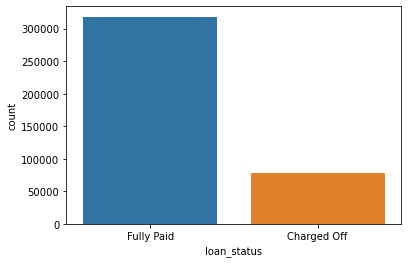

In [8]:
sns.countplot(df['loan_status'])

(0.0, 42000.0)

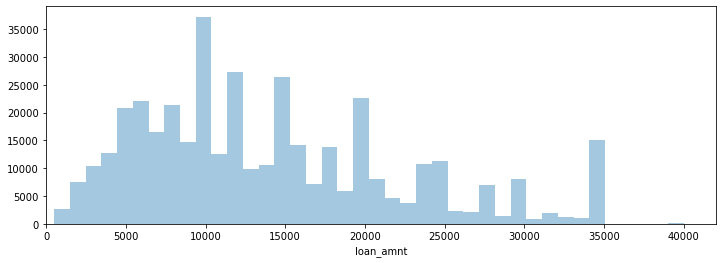

In [14]:
plt.figure(figsize=(12, 4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)
plt.xlim(0, 42000)

In [15]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


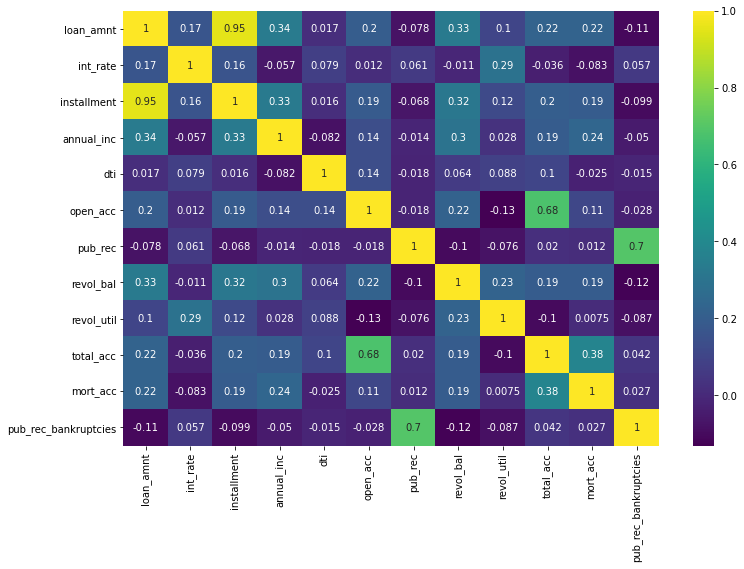

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

We can see that we have a near perfect correlation between loan amount and installment

In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


It makes sense that the monthly payment is correlated to the amount that was borrowed.

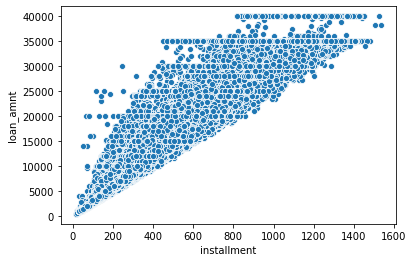

In [19]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

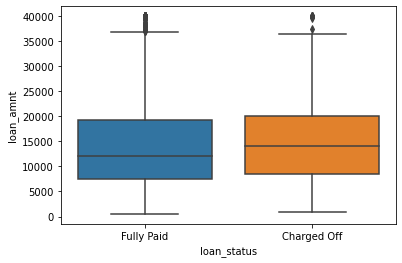

In [20]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


We can see that the average loan that gets paid back is a little less than the 
mean for the loans that doesn't get paid back.

Now let us explore what grades LendingClub gives to their customers

In [24]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [25]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

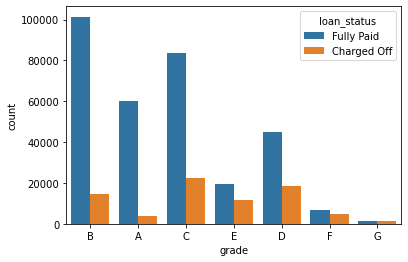

In [26]:
sns.countplot(df['grade'], hue=df['loan_status'])

It does look like they are better at paying back when they are graded higher

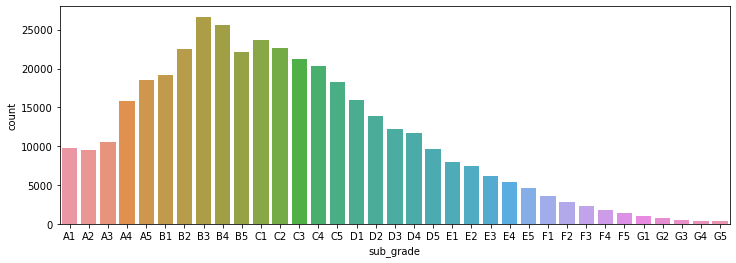

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(df['sub_grade'].sort_values())

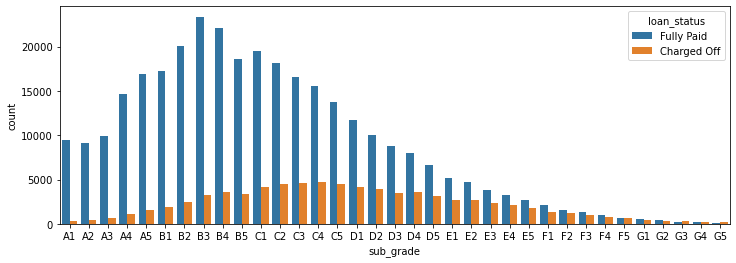

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(df['sub_grade'].sort_values(), hue=df['loan_status'])

In [29]:
F_and_G = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

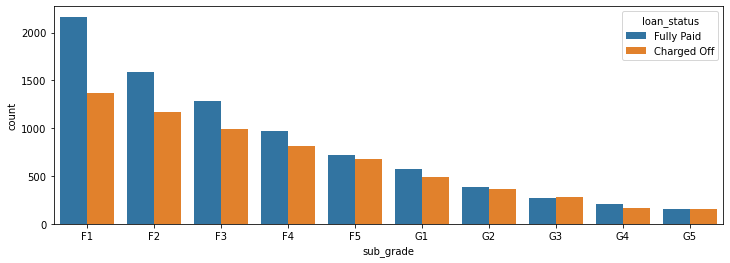

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(F_and_G['sub_grade'].sort_values(), hue=F_and_G['loan_status'])

We will convert loan_repaid to boolean values

In [31]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: x == 'Fully Paid')

In [32]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,True,Fully Paid
1,True,Fully Paid
2,True,Fully Paid
3,True,Fully Paid
4,False,Charged Off
...,...,...
396025,True,Fully Paid
396026,True,Fully Paid
396027,True,Fully Paid
396028,True,Fully Paid


In [33]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

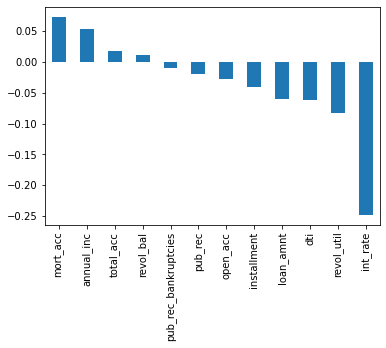

In [35]:
df.corr()['loan_repaid'].sort_values(ascending=False)[1:].plot(kind='bar')

We will now take a look at the missing data

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [39]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [40]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [44]:
df['emp_title'].nunique()

173105

In [42]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
AlaMark Technologies             1
Tom Keane Landscaping            1
CamFlor Inc                      1
Disabled American Veterans       1
Designer/merchandiser            1
Name: emp_title, Length: 173105, dtype: int64

Since there are so many different job titles, we are going to drop them instead of trying to fill in for the missing data

In [46]:
df.drop('emp_title', axis=1, inplace=True)

In [47]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [48]:
emp_length_order = ['< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years',
]

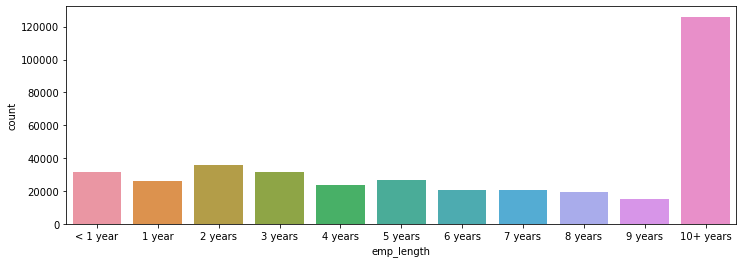

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(df['emp_length'], order=emp_length_order)

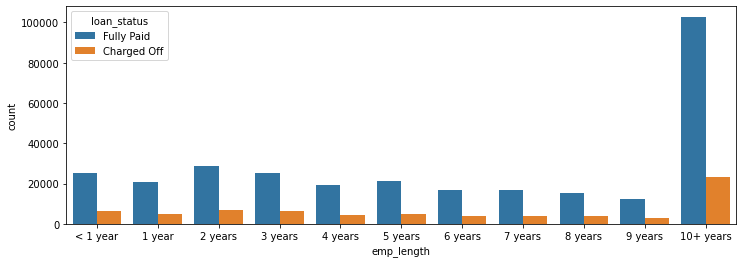

In [50]:
plt.figure(figsize=(12,4))
sns.countplot(df['emp_length'], order=emp_length_order, hue=df['loan_status'])

In [51]:
not_paid = df[df['loan_repaid'] == 0].groupby('emp_length').count()['loan_status']

In [52]:
paid_off = df[df['loan_repaid']==1].groupby("emp_length").count()['loan_status']

In [53]:
percent_not_paid = not_paid/(paid_off + not_paid) * 100

In [54]:
percent_not_paid

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

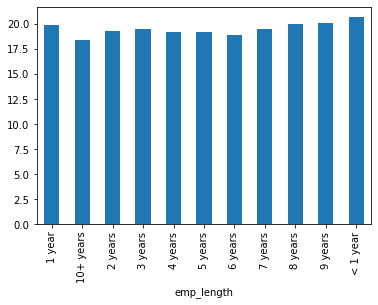

In [55]:
percent_not_paid.plot(kind='bar')

It looks like there are no clear connection between how long one has been employed and if they have payed back their loan.
We will therefore drop this column

In [57]:
df.drop('emp_length', axis=1, inplace=True)

In [58]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [59]:
df['title'].nunique()

48817

In [60]:
feat_info('title')

The loan title provided by the borrower


In [61]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [62]:
df[['title', 'purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [63]:
df.purpose.nunique()

14

Looks like the title column is just a more descriptive version of the purpose column.
We will drop the title column

In [66]:
df.drop('title', axis=1, inplace=True)

In [67]:
feat_info('mort_acc')

Number of mortgage accounts.


In [68]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [69]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [72]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [74]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [75]:
def sort_df(x, y):
    '''
    Adding the new values to mort_acc.
    '''
    if np.isnan(y):
        return total_acc_avg[x]
    else:
        return y

In [76]:
df['mort_acc'] = df.apply(lambda x: sort_df(x['total_acc'], x['mort_acc']), axis=1)

In [77]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [78]:
df = df[df['revol_util'].notnull()]

In [79]:
df = df[df['pub_rec_bankruptcies'].notnull()]

In [80]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [82]:
df.select_dtypes(include=object).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We will need to make the string columns into data our model can use

In [85]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [86]:
df['term'].nunique()

2

In [89]:
df['term'] = df['term'].apply(lambda x: 36 if '36' in x else 60)

In [90]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [91]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

We can also drop grade as we have subgrade

In [93]:
df.drop('grade', axis=1, inplace=True)

In [94]:
df_subgrades = pd.get_dummies(data=df['sub_grade'], drop_first=True)

In [95]:
df = df.join(df_subgrades)

In [96]:
df.drop('sub_grade', axis=1, inplace=True)

In [97]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [98]:
df.select_dtypes(include=object).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [99]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Since we only have a few 'other' and even fewer 'none' and 'any', we are going to combine them.

In [101]:
df.home_ownership = df.home_ownership.apply(lambda x: 'OTHER' if x == 'NONE' or x== 'ANY' else x)

In [102]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [103]:
home_owned = pd.get_dummies(df['home_ownership'], drop_first=1)

In [105]:
df = df.join(home_owned)

In [107]:
df.drop('home_ownership', axis=1, inplace=True)

In [108]:
df.select_dtypes(include=object).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [109]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [110]:
verf_status = pd.get_dummies(df['verification_status'], drop_first=1)

In [111]:
df = df.join(verf_status)

In [114]:
df.drop('verification_status', axis=1, inplace=True)

In [115]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Aug-2007        1
Oct-2007        1
Nov-2007        1
Name: issue_d, Length: 112, dtype: int64

In [116]:
feat_info('issue_d')

The month which the loan was funded


This column includes if a loan was issued, this is something we wouldn't know. This means that it could be data leakage. We will drop this column.

In [118]:
df.drop('issue_d', axis=1, inplace=True)

In [119]:
df.select_dtypes(include=object).columns

Index(['loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Earlier we made loan_repaid from loan_status, we are therefore going to drop loan_status.

In [120]:
df.drop('loan_status', axis=1, inplace=True)

In [121]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [122]:
df_purpose = pd.get_dummies(df['purpose'], drop_first=1)

In [124]:
df = df.join(df_purpose)

In [126]:
df.drop('purpose', axis=1, inplace=True)

In [127]:
df.select_dtypes(include=object).columns

Index(['earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [128]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Oct-1957       1
Aug-1962       1
Nov-1957       1
May-1962       1
Feb-1957       1
Name: earliest_cr_line, Length: 684, dtype: int64

We will extract the year from this column

In [129]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [130]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [131]:
df.select_dtypes(include=object).columns

Index(['initial_list_status', 'application_type', 'address'], dtype='object')

In [133]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [134]:
init_list_status = pd.get_dummies(df['initial_list_status'], drop_first=1)

In [135]:
df = df.join(init_list_status)

In [136]:
df.drop('initial_list_status', axis=1, inplace=True)

In [137]:
df.application_type.value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [139]:
appli_type = pd.get_dummies(df['application_type'], drop_first=1)

In [140]:
df = df.join(appli_type)

In [141]:
df.drop('application_type', axis=1, inplace=True)

In [142]:
df.select_dtypes(include=object).columns

Index(['address'], dtype='object')

We will take the zip code from the address

In [143]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [144]:
df.drop('address', axis=1, inplace=True)

In [145]:
zip_codes = pd.get_dummies(df.zip_code, drop_first=True)

In [146]:
df.drop('zip_code', axis=1, inplace=True)

In [150]:
df = df.join(zip_codes)

In [151]:
df.select_dtypes(include=object).columns

Index([], dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   dti                   395219 non-null  float64
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  loan_repaid           395219 non-null  bool   
 14  A2                    395219 non-null  uint8  
 15  

Now we have all data in integer, float or bool form, we can start the machine learning process.

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler = MinMaxScaler()

In [159]:
X_train = scaler.fit_transform(X_train)

In [160]:
X_test = scaler.transform(X_test)

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [162]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

We will use this deep learning model.
We start with 78 neurons as this is the number of measurements each of our datapoints will have.
For each layer we half the number of neurons until we are left with 19,
then we use a sigmoid function as to split the data into binary output.

In [163]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3006 - val_loss: 0.2662
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2657 - val_loss: 0.2628
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2627 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2617 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2603 - val_loss: 0.2611
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2598 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2594 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2590 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.258

In [164]:
losses = pd.DataFrame(model.history.history)

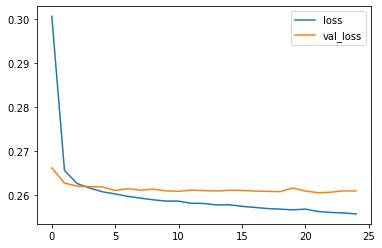

In [165]:
losses.plot()

We want to cut of the model before it overfits the training data

In [167]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [168]:
from sklearn.metrics import classification_report, confusion_matrix

In [169]:
print(classification_report(y_test, predictions))
print()
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      0.46      0.62     15658
        True       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044


[[ 7136  8522]
 [  362 63024]]


Our model seem to be pretty decent. We will now try to make a prediction.

In [170]:
import random
random.seed(101)
random_ind = random.randint(0, len(df))

new_customer = df.drop('loan_repaid', axis = 1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [171]:
model.predict_classes(new_customer.values.reshape(1, 78))

array([[1]])

In [172]:
df.iloc[random_ind]['loan_repaid']

True

Our model predicted correct 